In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1):
    try:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1])
    return coeff,k_err

def poly_plot3(ax,data,x,y,c='b',limits=(0,0),deg=1):
    if limits==(0,0):
        coeffs=poly_plot2(data[x].array,data[y].array,data[x].min(),data[x].max(),ax,c,deg=deg)
    else:
        coeffs=poly_plot2(data[x].array,data[y].array,limits[0],limits[1],ax,c,deg=deg)
    return coeffs

In [2]:
data=pd.read_csv("table1.csv")

data.head()

,U,I
0,0,-7501.66
1,1,58447.42
2,2,112810.76
3,5,271681.49
4,10,461188.89


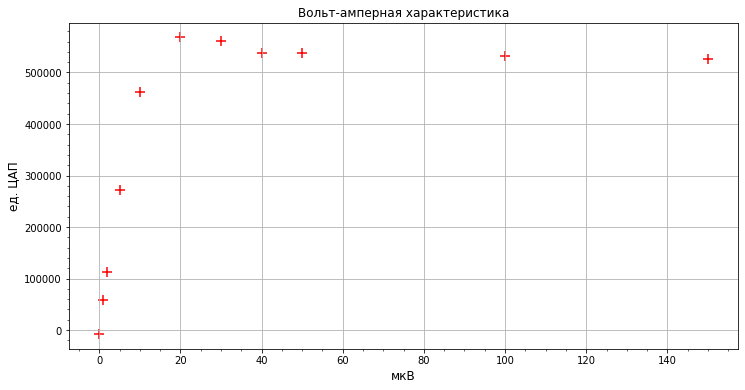

In [17]:
fig,ax=plt.subplots(figsize=(12,6))
data.plot(ax=ax,kind="scatter",x="U",y="I",s=100,marker='+',c='r')
plt.grid()
plt.xlabel("мкВ",size=12)
plt.ylabel("ед. ЦАП",size=12)
plt.title("Вольт-амперная характеристика",size=12)
ax.minorticks_on()
fig.savefig("graph1.pdf")

In [4]:
data2=pd.read_csv("table3.csv")
data2.head()

,nu,out,inp
0,0.1,108950,100395
1,0.2,111048,99910
2,0.5,105237,99104
3,1.0,91679,99103
4,2.0,75538,99327


In [12]:
data2["out/inp"]=data2.out/data2.inp
data2.head()

,nu,out,inp,out/inp,ln_ratio,ln_nu
0,0.1,108950,100395,1.085213,0.081777,-2.302585
1,0.2,111048,99910,1.111480,0.105693,-1.609438
2,0.5,105237,99104,1.061884,0.060045,-0.693147
3,1.0,91679,99103,0.925088,-0.077866,0.000000
4,2.0,75538,99327,0.760498,-0.273782,0.693147


In [13]:
data2["ln_ratio"]=np.log(data2["out/inp"])
data2["ln_nu"]=np.log(data2.nu)
data2.head()

,nu,out,inp,out/inp,ln_ratio,ln_nu
0,0.1,108950,100395,1.085213,0.081777,-2.302585
1,0.2,111048,99910,1.111480,0.105693,-1.609438
2,0.5,105237,99104,1.061884,0.060045,-0.693147
3,1.0,91679,99103,0.925088,-0.077866,0.000000
4,2.0,75538,99327,0.760498,-0.273782,0.693147


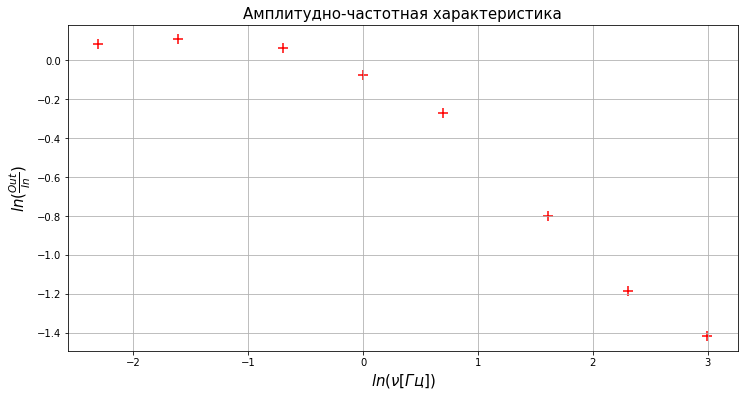

In [25]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="ln_nu",y="ln_ratio",s=100,marker='+',c='r')
plt.grid()
plt.ylabel(r"$ln(\frac{Out}{In})$",size=15)
plt.xlabel(r"$ln(\nu[Гц])$",size=15)
plt.title("Амплитудно-частотная характеристика",size=15)
fig.savefig("graph2.pdf")